In [1]:
import pandas as pd # used for managing the dataframes
import numpy as np # used for managing vectors and matrices
from wordcloud import WordCloud,STOPWORDS # for generating word clouds --> to show the most occuring words
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# graphing library
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
# NLTK libraries
import nltk
from nltk.corpus import stopwords

%matplotlib inline

In [2]:
train_set=pd.read_csv('train.csv')

In [3]:
train_set.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
train_set.shape

(38932, 5)

In [5]:
cnt_response = train_set["Is_Response"].value_counts()
trace1 = go.Bar(y=cnt_response.values,x=cnt_response.index,marker=dict(
        color = cnt_response.values,))
layout = go.Layout(
    title='Response Frequency'
)
data = [trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="gender_freq")

In [6]:
cnt_browser = train_set["Browser_Used"].value_counts()
trace1 = go.Bar(y=cnt_browser.values,x=cnt_browser.index,marker=dict(
        color = cnt_browser.values,))
layout = go.Layout(
    title='Browser Frequency'
)
data = [trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="browser_freq")

In [7]:
cnt_device = train_set["Device_Used"].value_counts()
labels = (np.array(cnt_device.index))
sizes = (np.array((cnt_device.values / cnt_device.values.sum())*100))
trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Device Usage distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="device_dist")

In [8]:
train_pos=train_set[train_set['Is_Response']=='happy']
train_neg=train_set[train_set['Is_Response']=='not happy']
train_pos=train_pos['Description']
train_neg=train_neg['Description']

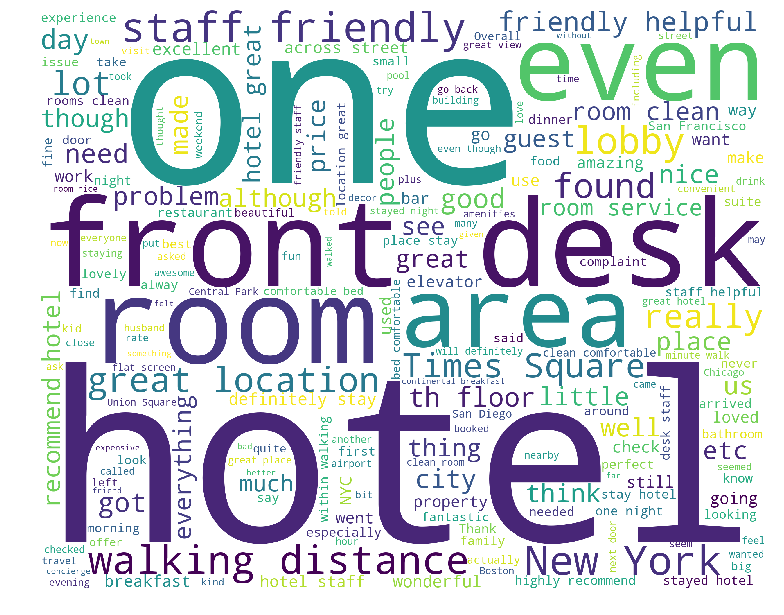

In [9]:
wc = WordCloud(stopwords=STOPWORDS,background_color='white',width=2500,height=2000).generate(" ".join(train_pos))
plt.figure(figsize=(13, 13))
plt.imshow(wc)
plt.axis('off')
plt.show()

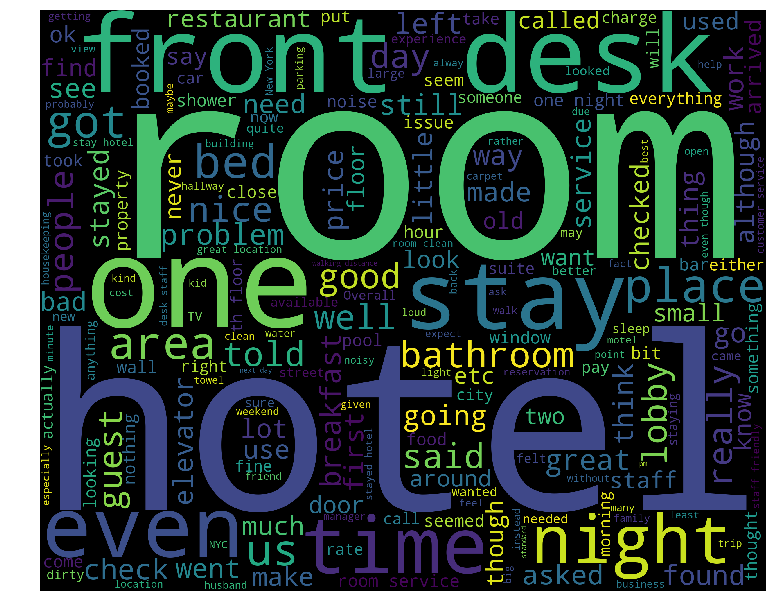

In [10]:
wc = WordCloud(stopwords=STOPWORDS,background_color='black',width=2500,height=2000).generate(" ".join(train_neg))
plt.figure(figsize=(13, 13))
plt.imshow(wc)
plt.axis('off')
plt.show()

## 2. Using TFLearn

In [9]:
import tflearn
from tflearn.data_utils import to_categorical,pad_sequences

/home/harisyam_bphc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Instructions for updating:
Use the retry module or similar alternatives.


In [10]:
# This function cleans the data and replace numbers by a common token: NUM. This function is inspired in kim's work
# at https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
import re
def clean_str(string):
    """
    Tokenization/string cleaning.
    """
    string = re.sub(r"[^A-Za-z0-9(),:!?\'\`]", " ", string)     
    string = re.sub(r"\'s", " \'s", string) 
    string = re.sub(r"\'ve", " \'ve", string) 
    string = re.sub(r"n\'t", " n\'t", string) 
    string = re.sub(r"\'re", " \'re", string) 
    string = re.sub(r"\'d", " \'d", string) 
    string = re.sub(r"\'ll", " \'ll", string) 
    string = re.sub(r",", " , ", string) 
    string = re.sub(r"!", " ! ", string) 
    string = re.sub(r"\(", " \( ", string) 
    string = re.sub(r"\)", " \) ", string) 
    string = re.sub(r":", " : ", string)
    string = re.sub(r"\?", " \? ", string) 
    string = re.sub(r"\s{2,}", " ", string)
    string = string.strip().lower()
    string = re.sub(r"[0-9]{2,}", "NUM", string)
    return string

In [11]:
train_set["Cleaned_Description"]=train_set["Description"].apply(clean_str)

In [12]:
train_set.head() # cleaned the description

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Cleaned_Description
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,the room was kind of clean but had a very stro...
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,"i stayed at the crown plaza april april , the ..."
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,i booked this hotel through hotwire at the low...
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,stayed here with husband and sons on the way t...
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,my girlfriends and i stayed here to celebrate ...


In [25]:
train_set.shape

(38932, 6)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
# this function will help in creating the tokenized Input Tensor 
vectorizer = CountVectorizer(stop_words='english',lowercase=False)

# fit the data
cleaned_description = vectorizer.fit(train_set["Cleaned_Description"])

# Get the vocabulary
vocabulary = cleaned_description.vocabulary_

# vocabulary is a dictionary with keys as the words and the values as frequencies
words = set(vocabulary.keys())

# Size of vocabulary
size_vocab = len(vocabulary)
print ("The vocabulary has {} words".format(size_vocab))

The vocabulary has 45634 words


In [17]:
# Get the data cleaned and transform words in numerical tokens.
text = train_set['Cleaned_Description'].tolist()
text = [string.split() for string in text]
# tokens is a list of lists. Each list inside tokens represents a sentence
tokens = []
for sentence in text:
    dummy = []
    for word in sentence:
        if word in words:
            dummy.append(vocabulary[word] + 1) # Sum 1 cause I want to leave the token 0 for padding in LSTM.
    tokens.append(dummy)
    
# Maximum length of a sentence in the data
max_len = max([len(sentence) for sentence in tokens])
print ("The largest sentence has {} tokens".format(max_len))

The largest sentence has 1056 tokens


In [19]:
X=tokens
#train_set['Response']=train_set['Is_Response'].map({'happy':0,'not happy':1})
Y=train_set[['Is_Response']]

In [20]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.3,random_state=0,stratify=Y.Is_Response)

In [21]:
# Sequence padding
trainX = pad_sequences(X_train, maxlen=max_len, value=0.) # max_len was found some cells above
validationX = pad_sequences(X_val, maxlen=max_len, value=0.)

# Converting labels to binary vectors
#train_Y = to_categorical(Y_train.values, nb_classes=2)
#val_Y = to_categorical(Y_val.values, nb_classes=2)
train_Y=pd.get_dummies(Y_train,columns=['Is_Response'])
val_Y=pd.get_dummies(Y_val,columns=['Is_Response'])

In [22]:
train_Y=train_Y.values
val_Y=val_Y.values

In [24]:
trainX.shape

(27252, 1056)

In [17]:
# Network building
net = tflearn.input_data([None, max_len])
net = tflearn.embedding(net, input_dim=size_vocab + 1, output_dim=128) # input_dim is size_vocab + 1 cause now we
                                                                        # have a 0 token. 
net = tflearn.lstm(net, 128, dropout=0.8)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.0001,
                         loss='categorical_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [18]:
# Training
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(trainX, train_Y, validation_set=(validationX, val_Y), show_metric=True,batch_size=64, n_epoch = 3)

Training Step: 1277  | total loss: 0.63643 | time: 257.728s
| Adam | epoch: 003 | loss: 0.63643 - acc: 0.6671 -- iter: 27200/27252
Training Step: 1278  | total loss: 0.63726 | time: 290.537s
| Adam | epoch: 003 | loss: 0.63726 - acc: 0.6660 | val_loss: 0.62596 - val_acc: 0.6813 -- iter: 27252/27252
--


In [19]:
# the sentences are not of equal length hence they have to be padded with zeros

In [22]:
size_vocab

45634

In [26]:
from keras.preprocessing import sequence
from keras.models import Sequential,load_model
from keras.layers.core import Activation,Dense,Dropout,SpatialDropout1D
from keras.layers.wrappers import Bidirectional
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM,GRU
from keras import regularizers
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [24]:
EMBEDDING_SIZE=128
HIDDEN_LAYER_SIZE=64
BATCH_SIZE=32
NUM_EPOCHS=2
DROPOUT=0.1

In [25]:
model=Sequential()
model.add(Embedding(size_vocab+1,EMBEDDING_SIZE,input_length=max_len))
model.add(SpatialDropout1D(DROPOUT))
model.add(Bidirectional(LSTM(HIDDEN_LAYER_SIZE,dropout=DROPOUT,recurrent_dropout=DROPOUT)))
model.add(Dense(2))
model.add(Activation("sigmoid"))
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1056, 128)         5841280   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 1056, 128)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 5,940,354
Trainable params: 5,940,354
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_filename="model.h5"

In [29]:
checkpoint=ModelCheckpoint(model_filename, monitor='val_acc', verbose=0, save_best_only=False, mode='auto', period=1)
history=model.fit(trainX, train_Y,batch_size=64,epochs=NUM_EPOCHS,validation_data=(validationX, val_Y),callbacks=[checkpoint])

Train on 27252 samples, validate on 11680 samples
Epoch 1/2
27252/27252 [==============================] - 2007s 74ms/step - loss: 0.3549 - acc: 0.8573 - val_loss: 0.3142 - val_acc: 0.8696
Epoch 2/2
27252/27252 [==============================] - 2014s 74ms/step - loss: 0.2761 - acc: 0.8922 - val_loss: 0.3054 - val_acc: 0.8746


In [29]:
model=load_model(model_filename)
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [30]:
test_set=pd.read_csv('test.csv')

In [31]:
test_set.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [32]:
test_set["Cleaned_Description"]=test_set["Description"].apply(clean_str)

In [33]:
# this function will help in creating the tokenized Input Tensor 
tvectorizer = CountVectorizer(stop_words='english',lowercase=False)

# fit the data
tcleaned_description = tvectorizer.fit(test_set["Cleaned_Description"])

# Get the vocabulary
tvocabulary = tcleaned_description.vocabulary_

# vocabulary is a dictionary with keys as the words and the values as frequencies
twords = set(tvocabulary.keys())

# Size of vocabulary
tsize_vocab = len(tvocabulary)
print ("The test vocabulary has {} words".format(tsize_vocab))

The test vocabulary has 39753 words


In [34]:
# Get the data cleaned and transform words in numerical tokens.
text = test_set['Cleaned_Description'].tolist()
text = [string.split() for string in text]
# tokens is a list of lists. Each list inside tokens represents a sentence
ttokens = []
for sentence in text:
    dummy = []
    for word in sentence:
        if word in words:
            dummy.append(vocabulary[word] + 1) # Sum 1 cause I want to leave the token 0 for padding in LSTM.
    ttokens.append(dummy)
    
# Maximum length of a sentence in the data
tmax_len = max([len(sentence) for sentence in ttokens])
print ("The largest sentence has {} tokens".format(tmax_len))

The largest sentence has 747 tokens


In [35]:
testX = pad_sequences(ttokens, maxlen=max_len, value=0.)